# Testing Accuracy of Perceptron Algorithm
Please refer previous notebooks for the implementation of Perceptron Algorithm. In this notebook we have only focemployd on testing the accuracy of the algorithm. We have generated two datasets for testing the algorithm. The first dataset a simple linearly seperable dataset. The second dataset is a data set which can be seperated by a non-linear circular decision boundary.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

We have employd the same algoritm, please refer to the previous notebook for the implementation of Perceptron Algorithm.

In [62]:
def perceptron(X, y, w_init=None, eta=0.1, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    weights : array-like, shape = (epochs,n_features + 1)
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        for i, x in enumerate(X):
            if (np.dot(x, w) * y[i]) <= 0:
                w = w + eta * x * y[i]
                e += 1
        errors.append(e)
        weights.append(w)
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)
    return weights, errors

We created a function to predict the class based on learned weights and features. We will employ to predict the class for the test dataset, and test the accuracy of the algorithm.

In [63]:
def predict(x, w):
    """
    Predict the output of a linear classifier.

    Parameters
    ----------
    x : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    y : array-like, shape = [n_samples]
        Predicted output of the classifier for each sample.

    """
    return np.sign(np.dot(x, w))

The predict batch function predicts a batch of samples and returns an array of predictions.

In [64]:
def predictBatch(X, w):
    """
    Predict the output of a linear classifier.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    y : array-like, shape = [n_samples]
        Predicted output of the classifier for each sample.

    """
    return np.sign(np.dot(X, w))

We created an accuracy function which when provided with learnt weights and actual labels, it employs the predict batch function to predict the class for the test dataset and then compares the predicted class with the actual class and returns the accuracy.

In [65]:
def measureAccuracy(X, y, w):
    """
    Measure the accuracy of a linear classifier.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    w : array-like, shape = [n_features + 1]
        Weights after fitting.

    Returns
    -------
    acc : float
        Measure of accuracy.

    """
    y_pred = predictBatch(X, w)
    return np.mean(y_pred == y)

In [66]:
def testTrainSplit(X, y, test_size=0.2):
    """
    Split the dataset into a training and a test set.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    test_size : float
        Percentage of the dataset to be employd as test set.

    Returns
    -------
    X_train : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    X_test : array-like, shape = [n_samples, n_features]
        Test vector, where n_samples in the number of samples and
        n_features is the number of features.
    y_train : array-like, shape = [n_samples]
        Target vector relative to X_train.
    y_test : array-like, shape = [n_samples]
        Target vector relative to X_test.

    """
    Ns = X.shape[0]
    Nt = int(Ns * test_size)
    idx = np.random.permutation(Ns)
    X_train = X[idx[Nt:], :]
    X_test = X[idx[:Nt], :]
    y_train = y[idx[Nt:]]
    y_test = y[idx[:Nt]]
    return X_train, X_test, y_train, y_test

## Linearly Seperable Dataset

In [67]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10), random_state=105)


In [68]:
print(np.unique(y))

[0 1]


In [69]:
y[y == 0] = -1

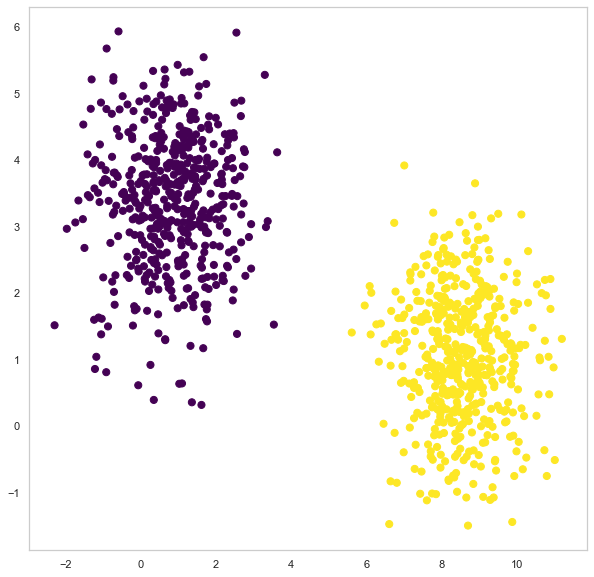

In [70]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [71]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]
X_train, X_test, y_train, y_test = testTrainSplit(X, y, test_size=0.5)

print(X_test.shape)
print(X_train.shape)

(500, 3)
(500, 3)


In [72]:
weights, errors = perceptron(X_train, y_train, epochs=1000)

epoch:  0 error:  4
epoch:  2 error:  0


### The Accuracy
We can see that as the algorithm converges at the end the train accuracy is one, while the test accuracy is close to one as the data was linearly seperabl.

In [73]:
finalWeight = weights[-1]
accuracy = measureAccuracy(X_train, y_train, finalWeight)
print("Train Accuracy: ", accuracy)

Train Accuracy:  1.0


In [74]:
finalWeight = weights[-1]
accuracy = measureAccuracy(X_test, y_test, finalWeight)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.996


## Circular Decision Boundary Dataset

In [75]:
X, y = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.065, random_state=100, factor=0.6)

In [76]:
y[y == 0] = -1

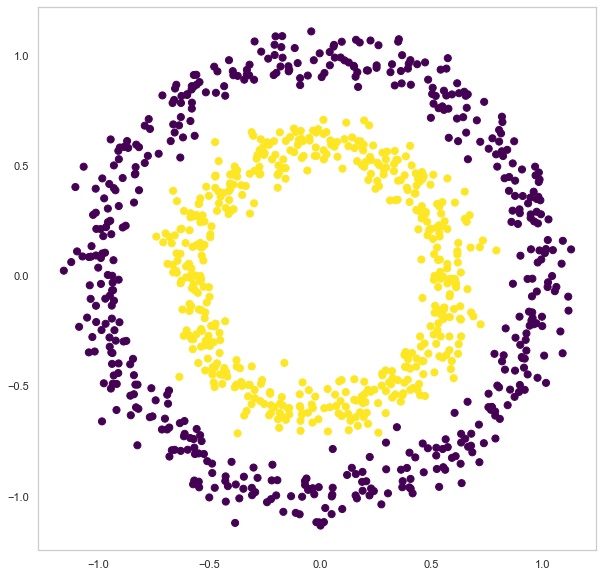

In [77]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [78]:
# augument 1, X[0]^2 X[1]^2 
X_aug = np.c_[np.ones(len(X)), X, X[:, 0] ** 2, X[:, 1] ** 2, X[:, 0] * X[:, 1]]

In [79]:
X_train, X_test, y_train, y_test = testTrainSplit(X_aug, y, test_size=0.5)

print(X_test.shape)
print(X_train.shape)

(500, 6)
(500, 6)


In [80]:
weights, errors = perceptron(X_train, y_train, w_init=[-1,-1,-1,-1, -1, 0], eta=0.1, epochs=5000)

epoch:  0 error:  34
epoch:  10 error:  4
epoch:  18 error:  0


### The Accuracy
We can see that as the algorithm converges at the end the train accuracy is one, while the test accuracy is close to one as the data was linearly seperabl.

In [81]:
finalWeight = weights[-1]
accuracy = measureAccuracy(X_train, y_train, finalWeight)
print("Train Accuracy: ", accuracy)

Train Accuracy:  1.0


In [82]:
finalWeight = weights[-1]
accuracy = measureAccuracy(X_test, y_test, finalWeight)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.996
